In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

# Assignment5


## Ground Cricket Chirps

In _The Song of Insects_ (1948) by George W. Pierce, Pierce mechanically measured the frequency (the number of wing vibrations per second) of chirps (or pulses of sound) made by a striped ground cricket, at various ground temperatures.  Since crickets are ectotherms (cold-blooded), the rate of their physiological processes and their overall metabolism are influenced by temperature.  Consequently, there is reason to believe that temperature would have a profound effect on aspects of their behavior, such as chirp frequency.

In general, it was found that crickets did not sing at temperatures colder than 60º F. or warmer than 100º F.

In [2]:
import pandas as pd
ground_cricket_data = {"Chirps/Second": [20.0, 16.0, 19.8, 18.4, 17.1, 15.5, 14.7,
                                         15.7, 15.4, 16.3, 15.0, 17.2, 16.0, 17.0,
                                         14.4],
                       "Ground Temperature": [88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7,
                                              71.6, 69.4, 83.3, 79.6, 82.6, 80.6, 83.5,
                                              76.3]}
df = pd.DataFrame(ground_cricket_data)

In [3]:
df

,Chirps/Second,Ground Temperature
0,20.0,88.6
1,16.0,71.6
2,19.8,93.3
3,18.4,84.3
4,17.1,80.6
5,15.5,75.2
6,14.7,69.7
7,15.7,71.6
8,15.4,69.4
9,16.3,83.3


### Tasks

1. Find the linear regression equation for this data.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
4. Extrapolate data:  If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?
5. Interpolate data:  With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second.  What was the approximate ground temperature that morning? 

#### 1.Linear Equation is y=mx+c

m=(∑Y)(∑X2)−(∑X)(∑XY)/n(∑x2)−(∑x)2

c== n(∑XY)−(∑X)(∑Y)/n(∑x2)−(∑x)2

In [4]:
df.columns

Index(['Chirps/Second', 'Ground Temperature'], dtype='object')

In [5]:
import numpy as np
x=np.array(df["Ground Temperature"]).reshape(-1,1)
y=np.array(df["Chirps/Second"]).reshape(-1,1)

In [6]:
model=LinearRegression()
model.fit(x,y)

LinearRegression()

In [7]:
x.shape

(15, 1)

In [8]:
predicted_value=model.predict(x)

In [9]:
df["predicted_value"]=predicted_value

# coefficent and intercept

In [10]:
model.coef_

array([[0.20299973]])

In [11]:
model.intercept_

array([0.45931465])

#### 2.chart the original data and linear equation 

In [12]:
df1=df.copy()

In [13]:
df1.drop("predicted_value",axis=1,inplace=True)

In [14]:
df1

,Chirps/Second,Ground Temperature
0,20.0,88.6
1,16.0,71.6
2,19.8,93.3
3,18.4,84.3
4,17.1,80.6
5,15.5,75.2
6,14.7,69.7
7,15.7,71.6
8,15.4,69.4
9,16.3,83.3


<AxesSubplot: >

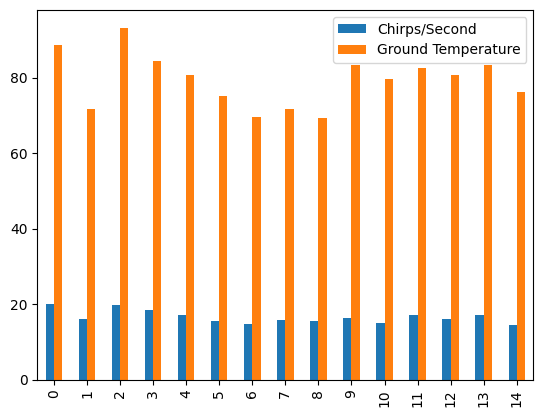

In [15]:
#original data
df1.plot(kind="bar")

<AxesSubplot: >

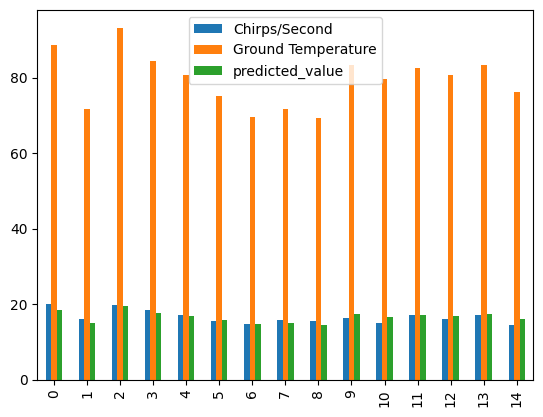

In [16]:
df.plot(kind="bar")

# 3.score method

In [17]:
model.score(x,y)

0.6922946529147004

### R2 score

In [18]:
from sklearn.metrics import r2_score as r

In [19]:
r(y,predicted_value)

0.6922946529147004

## 0.69 is the best score for this data on linear regression, Therefore the condition of 0.8 score is not meet up so the feature are weak correlection

##### 4.Extrapolate data: If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?

In [20]:
model.predict([[95]])

array([[19.74428913]])

### the approximate rate would you expect the crickets to be chirping is 19.7442

##### 5.Interpolate data: With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second. What was the approximate ground temperature that morning

In [21]:
model.predict([[87]])

array([[18.12029128]])

### the approximate ground temperature that morning is 87

## Brain vs. Body Weight

In the file `brain_body.txt`, the average brain and body weight for a number of mammal species are recorded. Load this data into a Pandas data frame.

### Tasks

1. Find the linear regression equation for this data for brain weight to body weight.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [22]:
df = pd.read_fwf("brain_body.txt")
df.head(2)

,Brain,Body
0,3.385,44.5
1,0.480,15.5


# 1.linear regression

In [23]:
x=np.array(df["Brain"]).reshape(-1,1)
y=np.array(df["Body"]).reshape(-1,1)

In [24]:
model=LinearRegression()
model.fit(x,y)

LinearRegression()

In [25]:
y_pred=model.predict(x)

Text(0.5, 1.0, 'Brain vs Body weight')

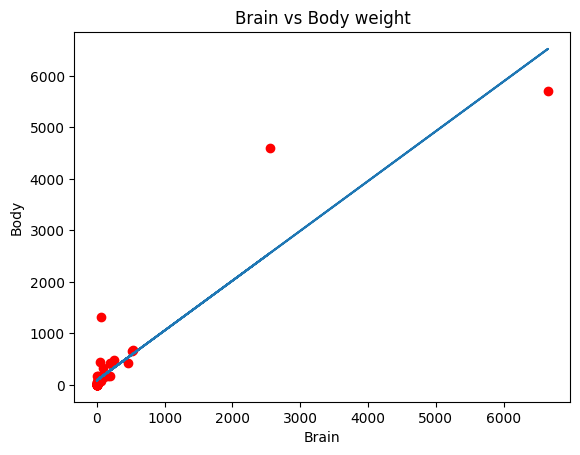

In [26]:
plt.scatter(x,y,c="red")
plt.plot(x,y_pred)
plt.xlabel("Brain")
plt.ylabel("Body")
plt.title("Brain vs Body weight")

In [27]:
model.score(x,y)#model score

0.8726620843043331

In [28]:
r(y,y_pred)#r2 score

0.8726620843043331

### Therefore the score of the brain vs body weight is around 87% and the feature of brain and body is strongly correlated

# Assignment7

## Salary Discrimination

The file `salary.txt` contains data for 52 tenure-track professors at a small Midwestern college. This data was used in legal proceedings in the 1980s about discrimination against women in salary.

The data in the file, by column:

1. Sex. 1 for female, 0 for male.
2. Rank. 1 for assistant professor, 2 for associate professor, 3 for full professor.
3. Year. Number of years in current rank.
4. Degree. Highest degree. 1 for doctorate, 0 for master's.
5. YSdeg. Years since highest degree was earned.
6. Salary. Salary/year in dollars.

### Tasks

1. Find the linear regression equation for this data using columns 1-5 to column 6.
2. Find the selection of columns with the best $R^2$ score.
3. Report whether sex is a factor in salary.

In [29]:
df = pd.read_fwf("salary.txt", header=None, 
                 names=["Sex", "Rank", "Year", "Degree", "YSdeg", "Salary"])
df.head(2)

,Sex,Rank,Year,Degree,YSdeg,Salary
0,0,3,25,1,35,36350
1,0,3,13,1,22,35350


# 1.Linear regression

In [30]:
x=df.drop("Salary",axis=1)
y=df["Salary"]

In [31]:
model=LinearRegression()
model.fit(x,y)

LinearRegression()

In [32]:
y_pred=model.predict(x)

# 2.find the selection of column with best column

In [33]:
#selecting all the feature
x=df.drop("Salary",axis=1)
y=df["Salary"]
model=LinearRegression()
model.fit(x,y)
y_pred=model.predict(x)
r(y,y_pred)

0.854718067441097

In [34]:
#removing sex feature
x=df.drop(["Sex","Salary"],axis=1)
y=df["Salary"]
model=LinearRegression()
model.fit(x,y)
y_pred=model.predict(x)
#model.score(x,y)
r(y,y_pred)
#showing the r2 score is low comparing to selecting all the feature so because of 0.01 different the sex is not much imporant

0.8485077204335425

In [35]:
#removing rank feature
x=df.drop(["Rank","Salary"],axis=1)
y=df["Salary"]
model=LinearRegression()
model.fit(x,y)
y_pred=model.predict(x)
#model.score(x,y)
r(y,y_pred)
#showing the r2 score is low comparing to selecting all the feature the rank is strong correleted with salary

0.6311597502907436

In [36]:
#removing Degree feature
x=df.drop(["Degree","Salary"],axis=1)
y=df["Salary"]
model=LinearRegression()
model.fit(x,y)
y_pred=model.predict(x)
#model.score(x,y)
r(y,y_pred)
#showing the r2 score is low comparing to selecting all the feature so because of 0.01 different the sex is not much imporant

0.8490366192262851

In [37]:
#removing YSdeg feature
x=df.drop(["Sex","Degree","YSdeg","Salary"],axis=1)
y=df["Salary"]
model=LinearRegression()
model.fit(x,y)
y_pred=model.predict(x)
#model.score(x,y)
r(y,y_pred)
#showing the r2 score is low comparing to selecting all the feature so because of 0.01 different the ysdeg is not much imporant

0.8436480933264597

In [38]:
#removing Year feature
x=df.drop(["Year","Salary"],axis=1)
y=df["Salary"]
model=LinearRegression()
model.fit(x,y)
y_pred=model.predict(x)
#model.score(x,y)
r(y,y_pred)
#showing the r2 score is low comparing to selecting all the feature so because of 0.01 different the sex is not much imporant

0.7671813414350668

# Conclusion

### the rank and year is strongly correlated with salary if we remove sex,degree,ysdeg the score difference is 0.01 

# 3.report wheter the sex is need in salary

# with sex feature the score is 85% without sex feature the score is 84% ALMOST SAME the difference is small hence neither nor we need sex feature 